In [1]:
from astropy.table import Table, Column
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from stacker import stacker, ParStacker

df_0 = pd.read_csv('../data/data_0.csv')
df_scaled = pd.read_csv('../data/data_scaled.csv')
tab = Table.read('../data/reduced_dr16q.fits')

In [2]:
# for eps in  np.linspace(0.6, 1.2, 7):        
eps=0.7

In [ ]:
db=DBSCAN(eps=eps,min_samples=8)
model=db.fit(df_scaled)
label=model.labels_
np.savetxt('../data/label-0.7.dat', label)

In [3]:
label = np.loadtxt('../data/label-0.7.dat')

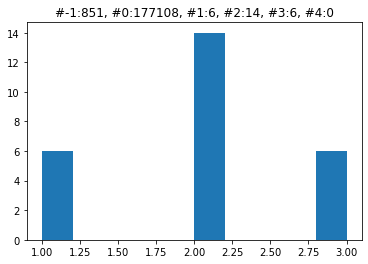

In [3]:
plt.hist(label[label>0])
plt.title('#-1:'+str(sum(label==-1)) +
', #0:'+str(sum(label==0)) +
', #1:'+str(sum(label==1))+
', #2:'+str(sum(label==2))+
', #3:'+str(sum(label==3)) + 
', #4:'+str(sum(label==4)))
plt.savefig('label-hist-eps%.2f.pdf'%(eps))
plt.show()

In [4]:
n_cl = np.size(np.unique(label))

for j in range(-1,n_cl):
    print(sum(label==j))

1843
176123
6
6
7
0


In [9]:
db=DBSCAN(eps=1.5,min_samples=8)
model=db.fit(df_scaled[label!=0])
label_noise=model.labels_
np.savetxt('label_noise.dat', label_noise)

In [10]:
n_cl = np.size(np.unique(label_noise))

for j in range(-1,n_cl):
    print(sum(label_noise==j))

297
1523
18
5
7
6
6
0


In [11]:
FIBERID = tab['FIBERID']
MJD = tab['MJD']
PLATE = tab['PLATE']
Z = tab['Z']

In [8]:
# median spectrum out of all objects in the main cluster -> label=0
MedSpec0 = stacker(Z[label==0], PLATE[label==0], 
                        MJD[label==0], FIBERID[label==0])
np.savetxt('MedSpec0-eps0.9-MinPts8.dat', MedSpec0)

100%|██████████| 177108/177108 [4:17:49<00:00, 11.45it/s]  
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [16]:
MedSpec0 = np.loadtxt('MedSpec0-eps0.9-MinPts8.dat')

In [14]:
# median spectrum out of all objects in the noise with label=1
FIBERID_NOISE = FIBERID[label!=0]
MJD_NOISE     = MJD[label!=0]
PLATE_NOISE   = PLATE[label!=0]
Z_NOISE       = Z[label!=0]

#label noise -1 (Noise of Noise)
MedSpecNoise_NN = stacker(Z_NOISE[label_noise==-1], PLATE_NOISE[label_noise==-1], 
                        MJD_NOISE[label_noise==-1], FIBERID_NOISE[label_noise==-1])
np.savetxt('MedSpec-Noise-Labeln1-eps2-MinPts5.dat', MedSpecNoise_NN)

#label noise 0
MedSpecNoise0 = stacker(Z_NOISE[label_noise==0], PLATE_NOISE[label_noise==0], 
                        MJD_NOISE[label_noise==0], FIBERID_NOISE[label_noise==0])
np.savetxt('MedSpec-Noise-Label0-eps2-MinPts5.dat', MedSpecNoise0)

# label noise 1
MedSpecNoise1 = stacker(Z_NOISE[label_noise==1], PLATE_NOISE[label_noise==1], 
                        MJD_NOISE[label_noise==1], FIBERID_NOISE[label_noise==1])
np.savetxt('MedSpec-Noise-Label1-eps2-MinPts5.dat', MedSpecNoise1)

# label noise 2
MedSpecNoise2 = stacker(Z_NOISE[label_noise==2], PLATE_NOISE[label_noise==2], 
                        MJD_NOISE[label_noise==2], FIBERID_NOISE[label_noise==2])
np.savetxt('MedSpec-Noise-Label2-eps2-MinPts5.dat', MedSpecNoise2)

# label noise 3
MedSpecNoise3 = stacker(Z_NOISE[label_noise==3], PLATE_NOISE[label_noise==3], 
                        MJD_NOISE[label_noise==3], FIBERID_NOISE[label_noise==3])
np.savetxt('MedSpec-Noise-Label3-eps2-MinPts5.dat', MedSpecNoise3)

# # label noise 4
# MedSpecNoise4 = stacker(Z_NOISE[label_noise==4], PLATE_NOISE[label_noise==4], 
#                         MJD_NOISE[label_noise==4], FIBERID_NOISE[label_noise==4])
# np.savetxt('MedSpec-Noise-Label4-eps2-MinPts5.dat', MedSpecNoise4)

 19%|█▉        | 56/297 [00:05<00:23, 10.46it/s]


KeyboardInterrupt: 

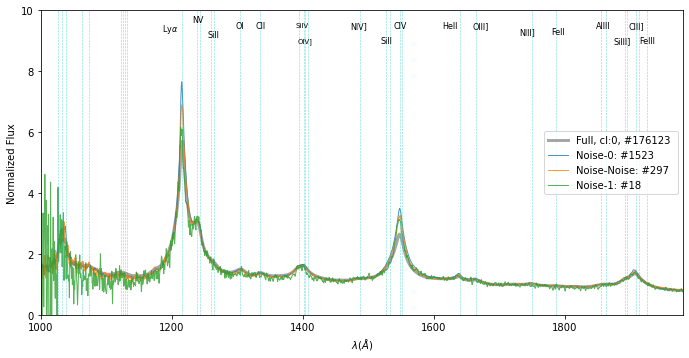

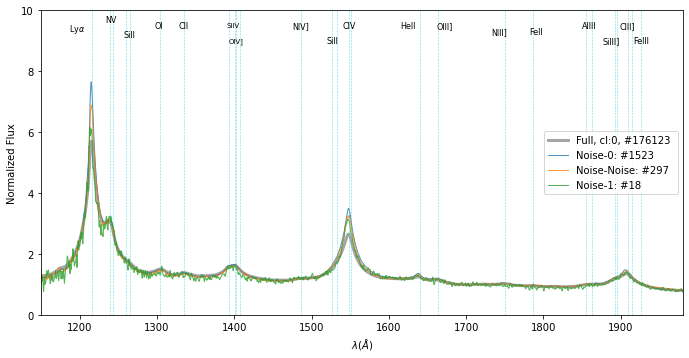

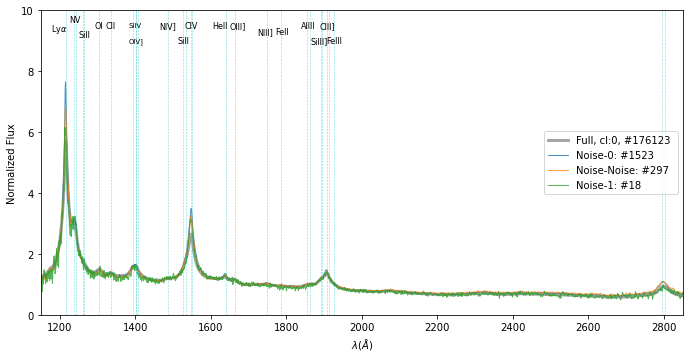

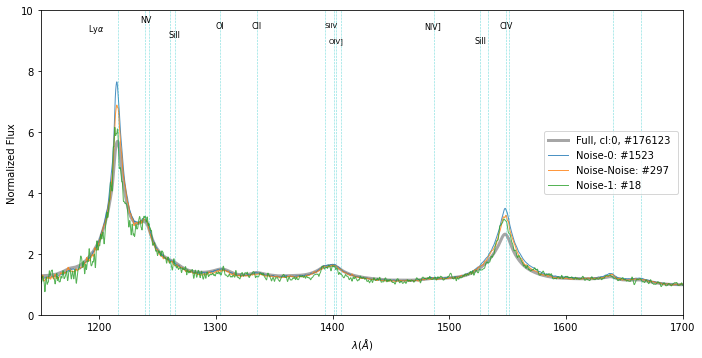

In [18]:
# Plotting Spectra -> REW

from scipy import ndimage
from line_db import line_db

c=['gray', 'C0', 'C1', 'C2', 'C3' , 'darkred']
ymax=10

ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7

# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)

#  Median properties in each bin

for ii in range(4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    
       
  
    


    SmoothedMedSpec_NN = ndimage.filters.gaussian_filter1d(MedSpecNoise_NN,2.0)
    SmoothedMedSpec_N0 = ndimage.filters.gaussian_filter1d(MedSpecNoise0,2.0)
    SmoothedMedSpec_N1 = ndimage.filters.gaussian_filter1d(MedSpecNoise1,2.0)
    SmoothedMedSpec_N2 = ndimage.filters.gaussian_filter1d(MedSpecNoise2,2.0)
    SmoothedMedSpec_N3 = ndimage.filters.gaussian_filter1d(MedSpecNoise3,2.0)
#     SmoothedMedSpec_N4 = ndimage.filters.gaussian_filter1d(MedSpecNoise4,2.0)
    SmoothedMedSpec_0  = ndimage.filters.gaussian_filter1d(MedSpec0,2.0)
      
    # masking for plot ranges
    ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    
    #plotting
    fig = plt.figure(figsize=(11.5,5.6))
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')
    x_median=lambda_min+200
    plt.plot(wgrid[ind],  SmoothedMedSpec_0[ind], c=c[0], label = 'Full, cl:0, #%d '%(sum(label==0)), lw=3, alpha=0.7)
    plt.plot(wgrid[ind],  SmoothedMedSpec_N0[ind], c=c[1], label = 'Noise-0: #%d'    %(sum(label_noise==0)), lw=1, alpha=0.8)
    plt.plot(wgrid[ind],  SmoothedMedSpec_NN[ind], c=c[2], label = 'Noise-Noise: #%d'%(sum(label_noise==-1)), lw=1, alpha=0.8)
    plt.plot(wgrid[ind],  SmoothedMedSpec_N1[ind],   c=c[3], label = 'Noise-1: #%d'    %(sum(label_noise==1)), lw=1, alpha=0.8)
#     plt.plot(wgrid[ind],  SmoothedMedSpec_N2[ind],   c=c[4], label = 'Noise-2: #%d'    %(sum(label_noise==2)), lw=1, alpha=0.8)
#     plt.plot(wgrid[ind],  SmoothedMedSpec_N3[ind],   c=c[4], label = 'Noise-3: #%d'    %(sum(label_noise==3)))
#     plt.plot(wgrid[ind],  SmoothedMedSpec_N4[ind],   c=c[5], label = 'Noise-4: #%d'    %(sum(label_noise==4)))
    plt.legend(loc=7)
    line_db(ymax, fs, fs1, ii) 
    fig_path = 'med-spec-%d-%d-eps0.7.png'%(lambda_min, lambda_max)
    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()




In [ ]:
#  Investigating median properties 
Z0 = Z[labels==0]
Z_noise = Z[labels==-1]
Z_noise_noise = Z_noise[label_noise==-1]

plt.hist(Z0, density=True, alpha=0.7, color ='gray')
# plt.hist(Z_noise, density=True, alpha=0.3, color='red')
plt.hist(Z_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('Z')
plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#  Investigating median properties 
Fui0 = Fuz[labels==0]
Fui_noise = Fui[labels==-1]
Fui_noise_noise = Fui_noise[label_noise==-1]

plt.hist(Fui0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fui_noise, density=True, alpha=0.3, color='red')
plt.hist(Fui_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-i)')
plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
Fuz0 = Fuz[labels==0]
Fuz_noise = Fuz[labels==-1]
Fuz_noise_noise = Fuz_noise[label_noise==-1]

plt.hist(Fuz0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fuz_noise, density=True, alpha=0.3, color='red')
plt.hist(Fuz_noise_noise, density=True, alpha=0.3, color='blue')
plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#  Investigating median properties 
FuW10 = FuW1[labels==0]
FuW1_noise = FuW1[labels==-1]
FuW1_noise_noise = FuW1_noise[label_noise==-1]

p,h,p2 =plt.hist(FuW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FuW1_noise, density=True, alpha=0.3, color='red')
p0, h0, p2= plt.hist(FuW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-W1)')
plt.savefig('histFuw1.png', dpi=1800)
plt.show()

In [ ]:

# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FuW20 = FuW2[labels==0]
FuW2_noise = FuW2[labels==-1]
FuW2_noise_noise = FuW2_noise[label_noise==-1]

plt.hist(FuW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FuW2_noise, density=True, alpha=0.3, color='red')
plt.hist(FuW2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-W2)')
plt.savefig('histFuw2.png', dpi=1800)

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
Fgz0 = Fgz[labels==0]
Fgz_noise = Fgz[labels==-1]
Fgz_noise_noise = Fgz_noise[label_noise==-1]

plt.hist(Fgz0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fgz_noise, density=True, alpha=0.3, color='red')
plt.hist(Fgz_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-z)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW10 = FgW1[labels==0]
FgW1_noise = FgW1[labels==-1]
FgW1_noise_noise = FgW1_noise[label_noise==-1]

plt.hist(FgW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-W1)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW20 = FgW2[labels==0]
FgW2_noise = FgW2[labels==-1]
FgW2_noise_noise = FgW2_noise[label_noise==-1]

plt.hist(FgW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-W2)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FrW10 = FrW1[labels==0]
FrW1_noise = FrW1[labels==-1]
FrW1_noise_noise = FrW1_noise[label_noise==-1]

plt.hist(FrW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FrW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(r-W1)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW20 = FgW2[labels==0]
FgW2_noise = FgW2[labels==-1]
FgW2_noise_noise = FgW2_noise[label_noise==-1]

plt.hist(FgW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW2_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(r-W2)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FrW10 = FrW1[labels==0]
FrW1_noise = FrW1[labels==-1]
FrW1_noise_noise = FrW1_noise[label_noise==-1]

plt.hist(FrW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FrW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(i-W2)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FW1W20 = FW1W2[labels==0]
FW1W2_noise = FW1W2[labels==-1]
FW1W2_noise_noise = FW1W2_noise[label_noise==-1]

plt.hist(FW1W20, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FW1W2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(W1-W2)')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
data_with_clust = pd.concat([df,pd.DataFrame({'cluster':this_labels})], axis = 1)
#print(data_with_clust.head())
outlier=data_with_clust[data_with_clust['cluster']!=0]
#print(outlier.head())
pca=PCA(n_components=3)
principal_comp=pca.fit_transform(df)
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3'])
# pca_df.head()
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':this_labels})], axis = 1)
pca_df.head()
# plt.figure(figsize=(10,10))
# filt=(pca_df['cluster']<1)
# #print(pca_df[filt].head())
# #ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df[filt])
# ax = sns.scatterplot(x="pca1", y="pca2", z="pca3", hue = "cluster", data = pca_df)
# plt.show()
# print(len(outlier))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# %matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = FuW1 # pca_df['pca1']
# y = FuW2 #pca_df['pca2']
z = FiW2 #pca_df['pca3']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
cc=['red', 'gray']
color=[]
for i in range(len(df)):
    color.append(cc[int(this_labels[i])+1])
ax.scatter(x,  z, c=color, alpha=0.4, s=1)

plt.show()